In [134]:
#Some basic functions in python, using type-checked functions
import matplotlib.pyplot as plt
from typing import Callable
from numpy import ndarray
from numpy import typing
import numpy as np

def square(x1: ndarray) -> ndarray:
    """
    Squares an array
    """
    return x1 * x1

def leaky_relu(x1: ndarray) -> ndarray:
    """
    Applies the leaky ReLU function to an array with a "leak rate" of 0.2
    """
    return np.maximum(x1*0.2, x1)

def sigmoid(x1: ndarray) -> ndarray:
    """Applies the sigmoid function to an array"""
    return 1 / (1 + np.e ** -x1)

def derivative(func: Callable[[ndarray], ndarray],
               input_: ndarray,
               delta: float = 0.001) -> ndarray:
    """
    Calculates the derivative of an input array against some function
    """
    return (func(input_ + delta) - func(input_ - delta))/(2*delta)

#Nested functions
from typing import List
Array_Function = Callable[[ndarray], ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain,
                   a: ndarray) -> ndarray:
    """
    Computes the output of a nested function of size 2
    """
    assert len(chain) == 2
    f1 = chain[0]
    f2 = chain[1]
    return f2(f1(a))

def chain_length_3(chain: Chain,
                   a: ndarray) -> ndarray:
    """
    Computes the output of a nested function of size 2
    """
    assert len(chain) == 3
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    return f3(f2(f1(a)))

def chain_derivative_2(
        chain: Chain,
        input_range: ndarray) -> ndarray:
    """Computes the chain-rule of a function of depth 2:
    df2/du(x) = df2/du(f1(x)) * df1/du(x)"""
    assert len(chain) == 2
    "This function requires a chain of length 2"
    assert input_range.ndim == 1
    "Function requires a 1 dimensional ndarray as input_range"


    f1 = chain[0]
    f2 = chain[1]
    f1_of_x = f1(input_range)
    df1_dx = derivative(f1, input_range)
    df2_du = derivative(f2, f1_of_x)
    return df1_dx * df2_du

def chain_derivative_3(
        chain: Chain,
        input_range: ndarray) -> ndarray:
    """
    Computes the chain-rule of a function of depth 3:
    df3/du(x) = df3/du(f2(f1(x))) * df2/du(f1(x)) * df1/du(x)
    """
    assert len(chain) == 3
    "Requires a chain of length 3"
    assert input_range.ndim == 1
    "Requires a 1 dimensional ndarray as input_range"

    f1 = chain [0]
    f2 = chain[1]
    f3 = chain[2]

    f1_of_x = f1(input_range)
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = derivative(f3, f2_of_x)
    df2du = derivative(f2, f1_of_x)
    df1dx = derivative(f1, input_range)
    
    return (df3du * df2du * df1dx)


#Functions with multiple inputs
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    '''
    Create a function for the computational graph where x and y are inputs for the sigma function, 
    a = sigma(x + y)
    '''
    assert x.shape == y.shape
    a = x + y
    return sigma(a)

def multiple_inputs_add_derivative(x: ndarray,
                                   y: ndarray,
                                   sigma: Array_Function) -> float:
    '''
    Coputes the derivative of the sigma function, a = x + y
    alpha(x, y) = x + y = a
    sigma(a) = variable nonlinear function of a
    df/dx = dsigma/du (x + y) * dalpha/dx(x, y)
    df/dy = dsigma/du (x + y) * dalpha/dy(x, y)

    Note that d(alpha(x, y))/dx = d(alpha(x, y))/dy = 1 
    '''
    a = x + y
    dsda = derivative(sigma, a)
    dadx, dady = 1, 1
    return dsda * dadx, dsda * dady

def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    '''
    Computes the dot product of two ndarrays and outputs an ndarray.
    '''
    #Number of columns in Matrix X must match the number of rows in Matrix W.
    assert X.shape[1] == W.shape[0]
    N = np.dot(X, W)
    return N

def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    '''
    Computes the derivative / backward pass of matrix multiplication, noting that the partial 
    derivative of v WRT X is just W^T since as each x_i element changes by epsilon, N will change by epsilon * w_i.
    '''
    dNdX = np.transpose(W, (1, 0))
    return dNdX

def mse(P: ndarray,
        Y: ndarray) -> float:
    '''
    Calculates the MSE between predicted and target values
    '''
    #assert P.shape[1] == 1
    assert P.shape == Y.shape
    return np.sum(np.square(Y - P))/P.shape[0]

In [83]:
X = np.array([[1, 2, 3, 4, 5]])
W = np.array([[2], 
              [4], 
              [6], 
              [8], 
              [10]])
matmul_backward_first(X, W)

array([[ 2,  4,  6,  8, 10]])

CPU times: user 10.4 ms, sys: 2.68 ms, total: 13.1 ms
Wall time: 12.2 ms


(-1.0, 1.0)

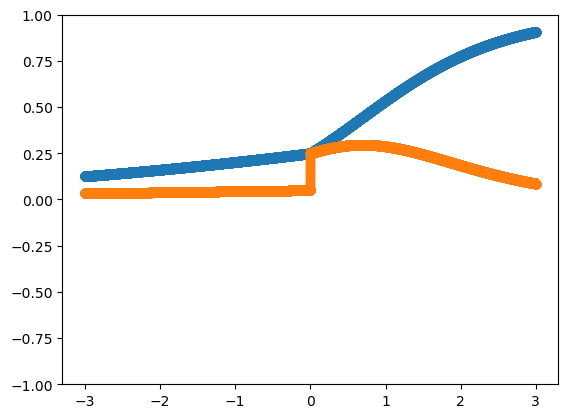

In [31]:
%%time
a = np.arange(-3,3, 0.0001)
b = chain_length_3([leaky_relu, sigmoid, square], a)
c = chain_derivative_3([leaky_relu, sigmoid, square], a)
plt.scatter(a,b)
plt.scatter(a,c)
plt.ylim(-1,1)